# Decision Tree Classifier on Bank Data Set

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Bank Data

df = pd.read_csv("downloads/bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [17]:
df.describe()

,age,job,marital,default,balance,housing,loan,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.411192,1.147755,0.016810,1422.657819,0.566025,0.152842,1.147755
std,10.576211,3.255716,0.599650,0.128575,3009.638142,0.495676,0.359875,0.599650
min,19.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,1.000000
50%,39.000000,4.000000,1.000000,0.000000,444.000000,1.000000,0.000000,1.000000
75%,49.000000,7.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,2.000000
max,87.000000,11.000000,2.000000,1.000000,71188.000000,1.000000,1.000000,2.000000


In [5]:
df.job.value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [6]:
#Dropping unnecessary columns

df = df.drop(["day","month","education","contact","duration","campaign","pdays","previous","poutcome"], axis='columns')

In [7]:
# Using labelEncoder to convert categorical variables into numerical format

Le = LabelEncoder()
df.marital = Le.fit_transform(df.marital)
df.housing = Le.fit_transform(df.housing)
df.loan = Le.fit_transform(df.loan)
df.default = Le.fit_transform(df.default)
df.y = Le.fit_transform(df.marital)

In [8]:
df['job']= label_encoder.fit_transform(df['job']) 
df['job'].unique() 

array([10,  7,  4,  1,  6,  9,  2,  0,  8,  3,  5, 11])

In [9]:
# Dataset is ready for training

df

,age,job,marital,default,balance,housing,loan,y
0,30,10,1,0,1787,0,0,1
1,33,7,1,0,4789,1,1,1
2,35,4,2,0,1350,1,0,2
3,30,4,1,0,1476,1,1,1
4,59,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
4516,33,7,1,0,-333,1,0,1
4517,57,6,1,1,-3313,1,1,1
4518,57,9,1,0,295,0,0,1
4519,28,1,1,0,1137,0,0,1


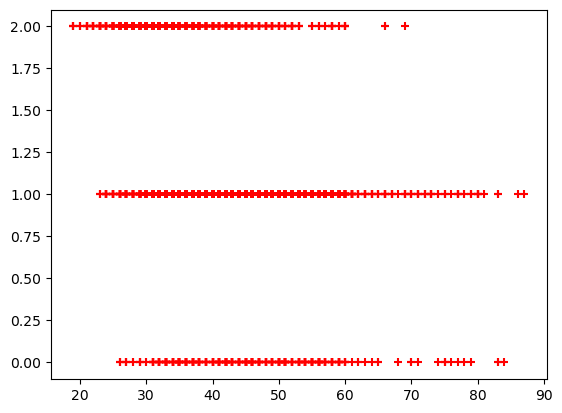

In [18]:
# Plotting the relation between age and if the client has subscribed a term deposit
plt.scatter(df.age, df.y, marker = "+", color = "red")
plt.show()

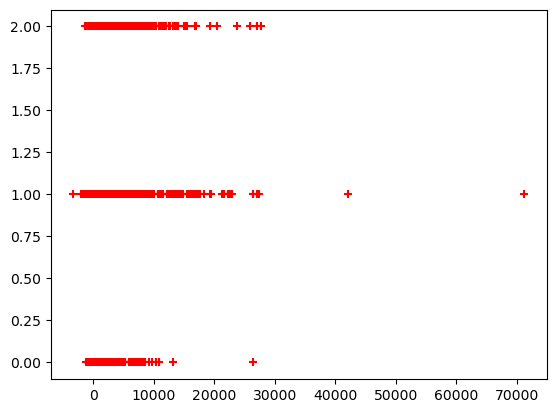

In [21]:
# Plotting the relation between balance and if the client has subscribed a term deposit

plt.scatter(df.balance, df.y, marker = "+", color = "red")
plt.show()

In [10]:
# Separating Independent Variables and Dependent Variables

X = [ "age","job","marital","default","balance","housing","loan"]
X = df[X]
y = df['y']

In [11]:
# Creating Decision Tree Classifier

clf = DecisionTreeClassifier(random_state = 42)

In [12]:
# Training the model

clf.fit(X,y)

DecisionTreeClassifier(random_state=42)

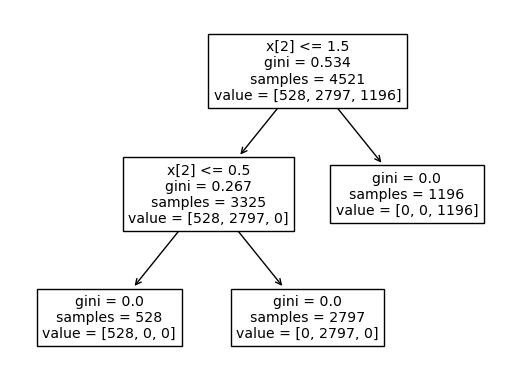

In [13]:
# Visualizing the Decision Tree

Decision_tree = tree.plot_tree(clf)

In [14]:
# Accuracy of the Model

clf.score(X,y)

1.0

In [15]:
# Prediction

clf.predict([[30,10,1,0,1787,0,0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)